In [2]:
import sys

sys.path.append("../")

from honeybee_comb_inferer.inference import HoneyBeeCombInferer

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
model_name = "unet_effnetb0"
device = "cuda:3"
path_to_pretrained_models = "../models"

In [5]:
model = HoneyBeeCombInferer(model_name=model_name, path_to_pretrained_models=path_to_pretrained_models, device=device)


In [6]:
path_to_image = "../data/images/Cam_0_2019-07-24T15_29_46.791050+00_00.png"
pred = model.infer(image = path_to_image)
print(pred.shape)

(3000, 4000)


100%|██████████| 3000/3000 [00:01<00:00, 1867.68it/s]


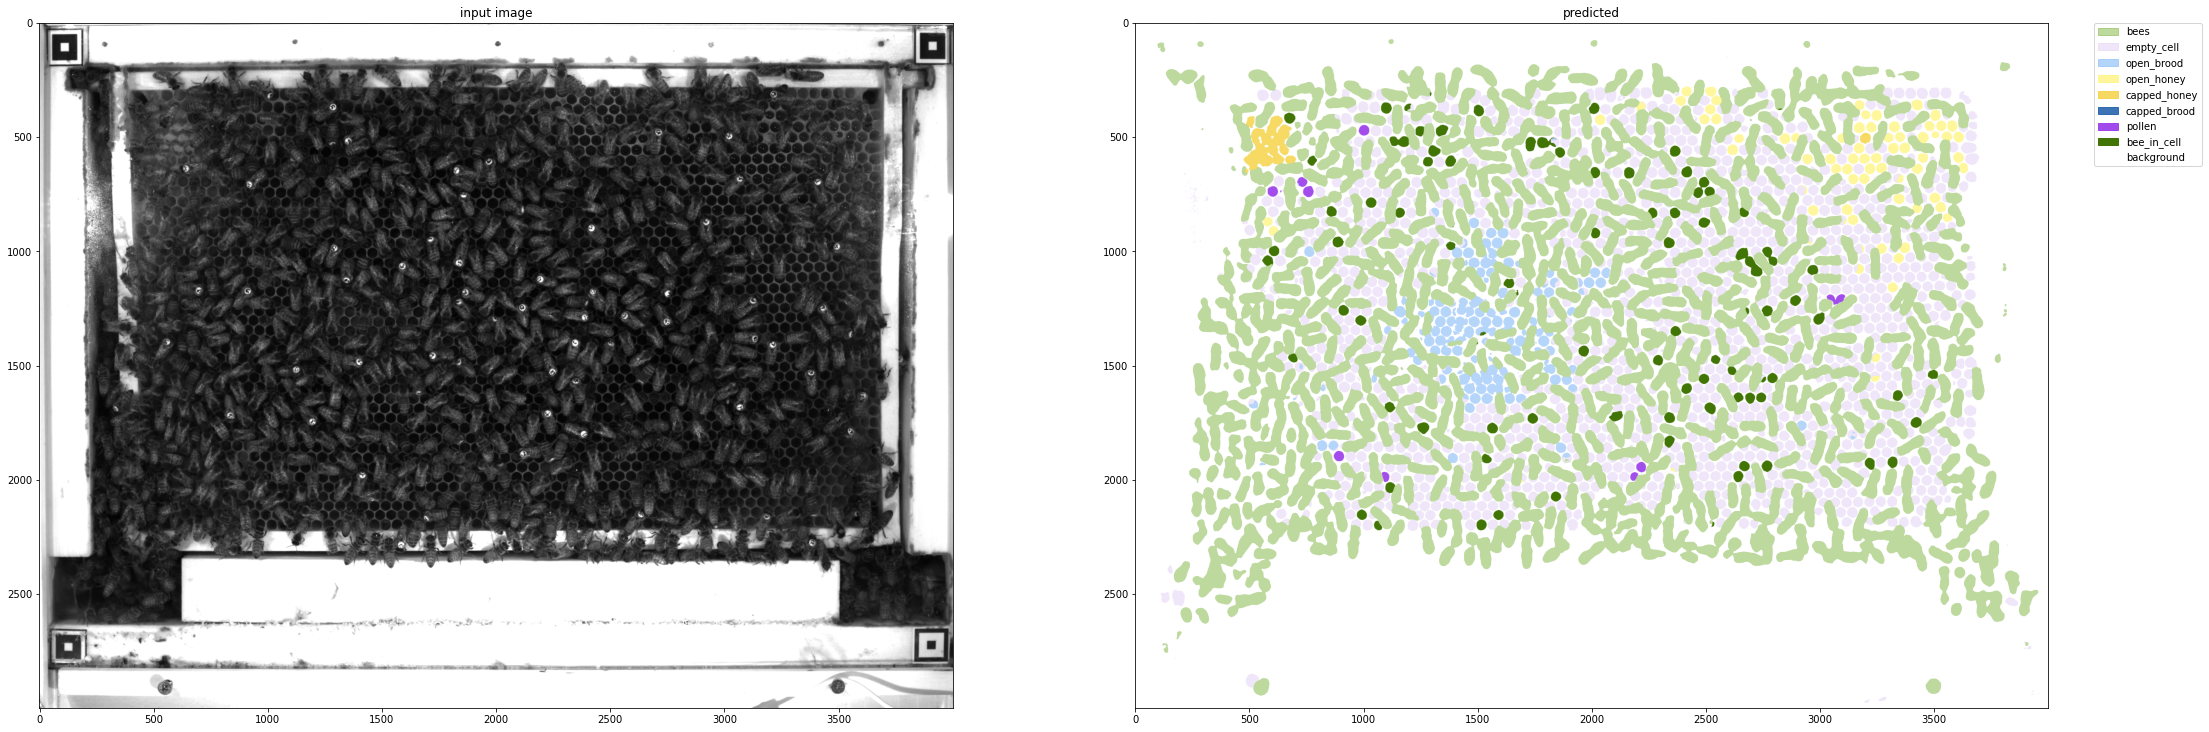

In [7]:
model.plot_prediction(pred, input_image=path_to_image)

# Infer by cleaning-out bees

based on 100 images taken consecutively during 2 hours

In [8]:
import os

# 100 consecutive images made during 2 hours
path_to_close_frames = "../../honeybee_cells_segmentation/inference_data/image_close_frames"
len(os.listdir(path_to_close_frames))

100

In [12]:

pred_no_bees = model.infer_without_bees(os.path.abspath(path_to_close_frames))

100%|██████████| 25/25 [02:17<00:00,  5.50s/it]


100%|██████████| 3000/3000 [00:01<00:00, 1949.56it/s]


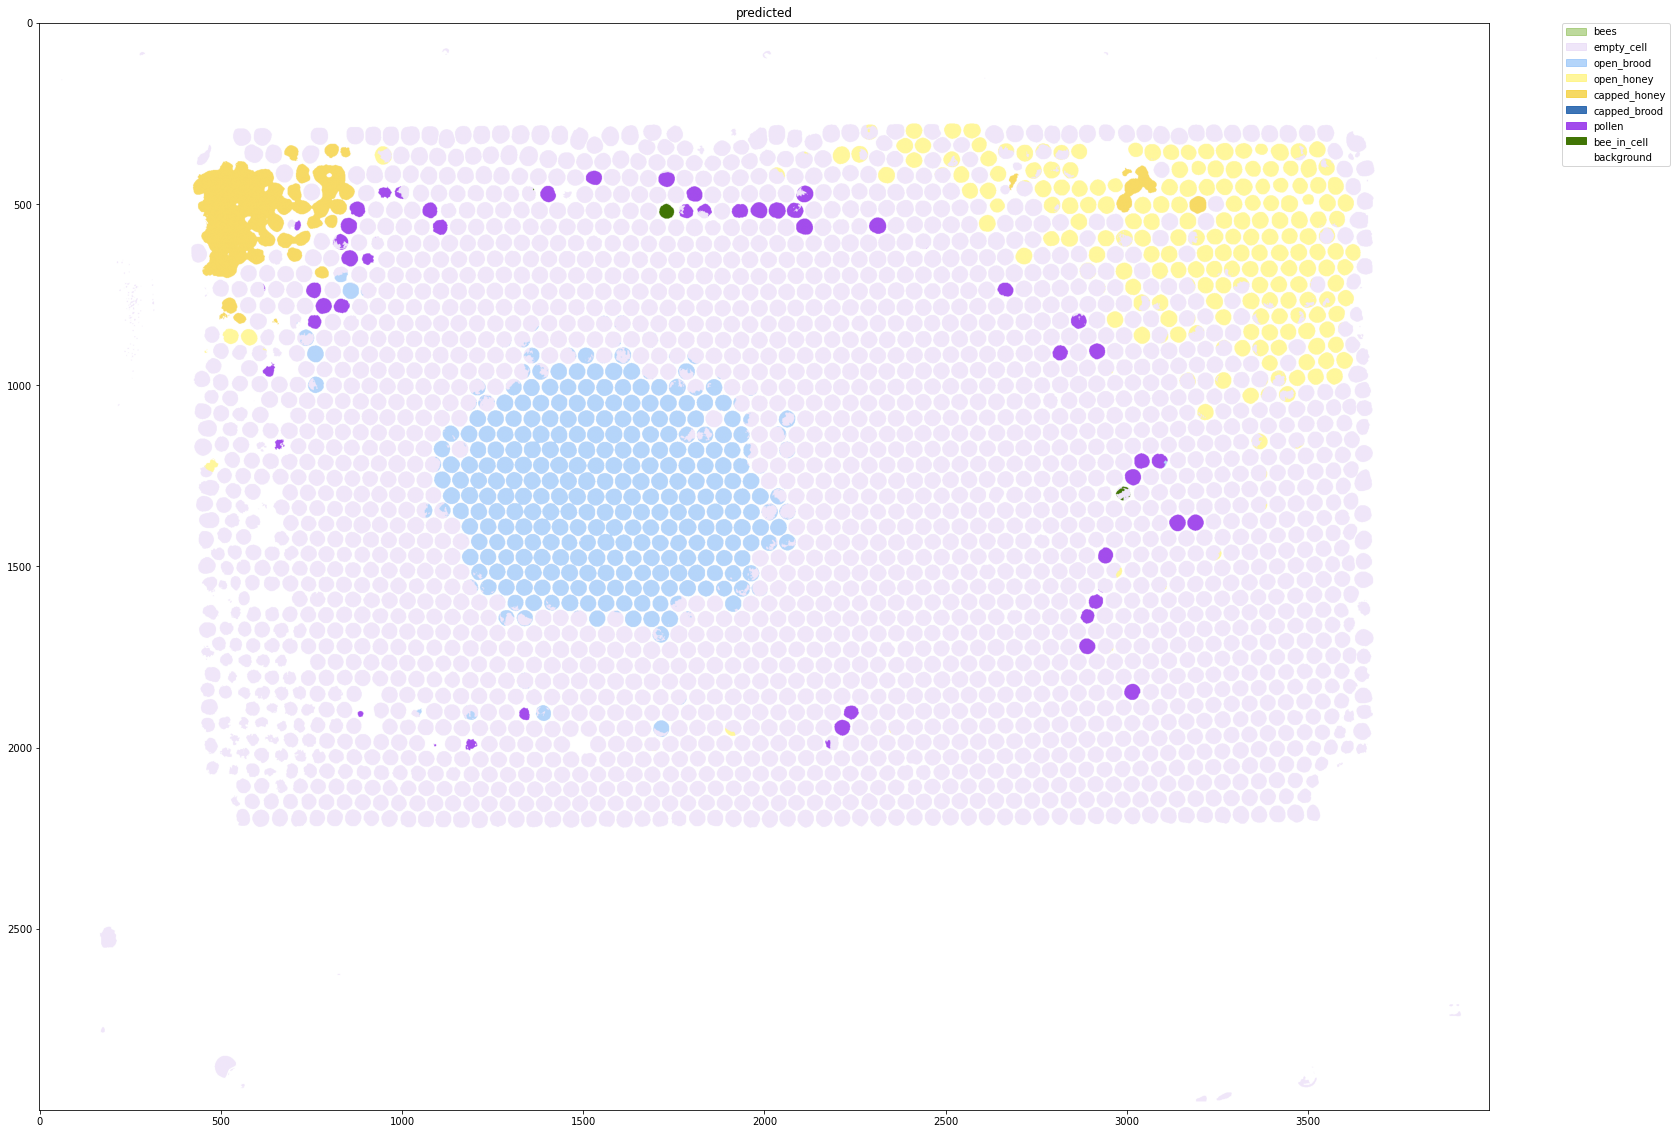

In [13]:
model.plot_prediction(pred_no_bees)

# Counting of individual cells

In [14]:
from honeybee_comb_inferer.cell_counter import CellCounter

In [16]:
cell_counter = CellCounter(inferred_mask=pred_no_bees, method = "edt")

In [17]:
# Euclidean Distance Transform
cell_counter.run_counter()

Time taken:  4.976 sec.
Total number of cells: 2717


{'empty_cell': 2204,
 'open_brood': 261,
 'open_honey': 178,
 'capped_honey': 23,
 'pollen': 48,
 'bee_in_cell': 3}

In [18]:
# Circle Hough Transform
cell_counter.method = "cht"
cell_counter.run_counter()

Time taken:  28.876 sec.
Total number of cells: 2844


{'empty_cell': 2260,
 'open_brood': 285,
 'open_honey': 206,
 'capped_honey': 45,
 'pollen': 46,
 'bee_in_cell': 2}